# Exercise 9.7.7

# Data Setup

In [1]:
## import required libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
## import/load the auto dataset

auto = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep="\s+", header=None, na_values="?")
auto.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin", "name"] ## name columns
auto = auto.dropna(axis=0) ## drop rows with missing values (6 rows -- all missing values in horsepower column)

In [3]:
## display first few rows of data

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
## create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage
## below the median -- we use numpy to do this

auto["mpg_high"] = np.where(auto["mpg"] >= auto["mpg"].median(), 1, 0)

In [5]:
## split data into training and test sets

X = auto.drop(["mpg", "mpg_high", "name"], axis=1) ## also need to remove non-numeric data (for scaling in next step)
y = auto["mpg_high"] ## y target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1693)

In [6]:
## scale data -- necessary for SVC (sensative to scale) 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) ## apply same transformation to test data 

# Linear SVC

In [7]:
## fit SVC model (LINEAR)
## use various cost values to predict whether car gets high or low gas mileage (hyperparameter tuning) 

costs = [0.1, 1, 10, 100, 1000]
cv_errors = []
for cost in costs:
    svc_linear = svm.SVC(kernel='linear', C=cost)
    ## compute the CV accuracy using 10-fold cross-validation
    ## the following line computes the mean accuracy score across the 10 folds
    cv_error = np.mean(cross_val_score(svc_linear, X_train_scaled, y_train, cv=10, scoring='accuracy')) 
    cv_errors.append(1-cv_error)

print("Cross-validation accuracy for linear SVC:")
for cost, error in zip(costs, cv_errors):
    print("Cost:", cost, "Error Rate:", error)

Cross-validation accuracy for linear SVC:
Cost: 0.1 Error Rate: 0.08386243386243386
Cost: 1 Error Rate: 0.07301587301587298
Cost: 10 Error Rate: 0.07288359788359777
Cost: 100 Error Rate: 0.07288359788359777
Cost: 1000 Error Rate: 0.07288359788359777


We can see that the model is pretty accurate and the cross validation errors are low. The best cost value (lowest CV error) would be 10.

In [8]:
## fit SVC model with best cost on training data

best_cost = costs[np.argmin(cv_errors)] ## find the cost value that produces the lowest CV error rate
svc_linear = svm.SVC(kernel='linear', C=best_cost)
svc_linear.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [9]:
## make predictions on test data and evaluate predictions

y_pred = svc_linear.predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8813559322033898


In [10]:
## print the predicted class labels

print("Predicted class labels: ", y_pred)

Predicted class labels:  [0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1]


In [11]:
## confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", conf_mat)

Confusion Matrix:  [[52 10]
 [ 4 52]]


# Radial SVM

In [12]:
## fit SVC model (RADIAL)
## use various cost and gamma values to predict whether car gets high or low gas mileage

costs = [0.1, 1, 10, 100, 1000]
gammas = [0.5, 1, 2, 3, 4] 
cv_errors_rad = []
for cost in costs:
    for gamma in gammas:
        svc_rad = svm.SVC(kernel='rbf', C=cost, gamma=gamma)
        cv_error = np.mean(cross_val_score(svc_rad, X_train_scaled, y_train, cv=10, scoring='accuracy'))
        cv_errors_rad.append(1-cv_error)
        print("Cost:", cost, "Gamma:", gamma, "Error Rate:", 1-cv_error)

Cost: 0.1 Gamma: 0.5 Error Rate: 0.08029100529100519
Cost: 0.1 Gamma: 1 Error Rate: 0.09113756613756618
Cost: 0.1 Gamma: 2 Error Rate: 0.2772486772486773
Cost: 0.1 Gamma: 3 Error Rate: 0.47076719576719595
Cost: 0.1 Gamma: 4 Error Rate: 0.48888888888888893
Cost: 1 Gamma: 0.5 Error Rate: 0.07645502645502644
Cost: 1 Gamma: 1 Error Rate: 0.07619047619047625
Cost: 1 Gamma: 2 Error Rate: 0.08716931216931223
Cost: 1 Gamma: 3 Error Rate: 0.09100529100529098
Cost: 1 Gamma: 4 Error Rate: 0.09444444444444444
Cost: 10 Gamma: 0.5 Error Rate: 0.072883597883598
Cost: 10 Gamma: 1 Error Rate: 0.09470899470899474
Cost: 10 Gamma: 2 Error Rate: 0.10224867724867726
Cost: 10 Gamma: 3 Error Rate: 0.11309523809523814
Cost: 10 Gamma: 4 Error Rate: 0.11679894179894179
Cost: 100 Gamma: 0.5 Error Rate: 0.10621693121693121
Cost: 100 Gamma: 1 Error Rate: 0.1059523809523808
Cost: 100 Gamma: 2 Error Rate: 0.11322751322751334
Cost: 100 Gamma: 3 Error Rate: 0.11679894179894179
Cost: 100 Gamma: 4 Error Rate: 0.116798941

We can see that the model is pretty accurate and the cross validation errors are low. The best cost/gamma value (lowest CV error) would be cost = 10 and gamma = .5.

In [13]:
## fit SVM model with best cost/gamma on training data

best_cost_gamma = [(c, g) for c in costs for g in gammas][np.argmin(cv_errors_rad)]
svc_rad = svm.SVC(kernel='rbf', C=best_cost_gamma[0], gamma=best_cost_gamma[1])
svc_rad.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.5)

In [14]:
## make predictions on test data and evaluate predictions

y_pred_rad = svc_rad.predict(X_test_scaled)
accuracy_rad = np.mean(y_pred_rad == y_test)
print(f"Accuracy: {accuracy_rad}")

Accuracy: 0.9067796610169492


In [15]:
## print the predicted class labels

print("Predicted class labels: ", y_pred_rad)

Predicted class labels:  [0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 1]


In [16]:
## confusion matrix

conf_mat_rad = confusion_matrix(y_test, y_pred_rad)
print("Confusion Matrix: ", conf_mat_rad)

Confusion Matrix:  [[55  7]
 [ 4 52]]


# Polynomial SVM

In [17]:
## fit SVM model (POLYNOMIAL)
## use various cost and degree values to predict whether car gets high or low gas mileage

costs = [0.1, 1, 10, 100, 1000]
degrees = [2, 3, 4, 5]
cv_errors_poly = []
for cost in costs:
    for degree in degrees:
        svc_poly = svm.SVC(kernel='poly', C=cost, degree=degree)
        cv_error = np.mean(cross_val_score(svc_poly, X_train_scaled, y_train, cv=10, scoring='accuracy'))
        cv_errors_poly.append(1-cv_error)
        print("Cost:", cost, "Degree:", degree, "Error Rate:", 1-cv_error)


Cost: 0.1 Degree: 2 Error Rate: 0.27394179894179893
Cost: 0.1 Degree: 3 Error Rate: 0.241005291005291
Cost: 0.1 Degree: 4 Error Rate: 0.27380952380952395
Cost: 0.1 Degree: 5 Error Rate: 0.24828042328042332
Cost: 1 Degree: 2 Error Rate: 0.27010582010582007
Cost: 1 Degree: 3 Error Rate: 0.10515873015873023
Cost: 1 Degree: 4 Error Rate: 0.258994708994709
Cost: 1 Degree: 5 Error Rate: 0.134920634920635
Cost: 10 Degree: 2 Error Rate: 0.14907407407407403
Cost: 10 Degree: 3 Error Rate: 0.08359788359788367
Cost: 10 Degree: 4 Error Rate: 0.14880952380952395
Cost: 10 Degree: 5 Error Rate: 0.1164021164021165
Cost: 100 Degree: 2 Error Rate: 0.17460317460317454
Cost: 100 Degree: 3 Error Rate: 0.08015873015873021
Cost: 100 Degree: 4 Error Rate: 0.14960317460317474
Cost: 100 Degree: 5 Error Rate: 0.1089947089947092
Cost: 1000 Degree: 2 Error Rate: 0.16375661375661377
Cost: 1000 Degree: 3 Error Rate: 0.1165343915343916
Cost: 1000 Degree: 4 Error Rate: 0.1608465608465609
Cost: 1000 Degree: 5 Error Rate

We can see that the model is pretty accurate and the cross validation errors are low. The best cost/degree value (lowest CV error) would be cost = 100 and degree = 3.

In [18]:
## fit SVM model with best cost/degree on training data

best_cost_degree = [(c, d) for c in costs for d in degrees][np.argmin(cv_errors_poly)]
svc_poly = svm.SVC(kernel='poly', C=best_cost_degree[0], degree=best_cost_degree[1])
svc_poly.fit(X_train_scaled, y_train)

SVC(C=100, kernel='poly')

In [19]:
## make predictions on test data and evaluate predictions

y_pred_poly = svc_poly.predict(X_test_scaled)
accuracy_poly = np.mean(y_pred_poly == y_test)
print(f"Accuracy: {accuracy_poly}")

Accuracy: 0.923728813559322


In [20]:
## print the predicted class labels

print("Predicted class labels: ", y_pred_poly)

Predicted class labels:  [0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1]


In [21]:
## confusion matrix

conf_mat_poly = confusion_matrix(y_test, y_pred_poly)
print("Confusion Matrix: ", conf_mat_poly)

Confusion Matrix:  [[57  5]
 [ 4 52]]


# Graphs & Summary

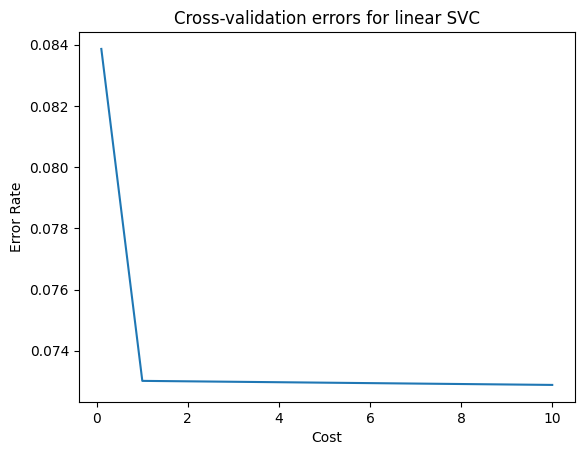

In [22]:
## plot the cross-validation errors for the linear SVC

costs_2 = costs[0:3] ## only showing cost values of 0.1, 1, 10 to make the graph not as spread out
cv_errors = cv_errors[0:3]
plt.plot(costs_2, cv_errors)
plt.xlabel('Cost')
plt.ylabel('Error Rate')
plt.title('Cross-validation errors for linear SVC')
plt.show()

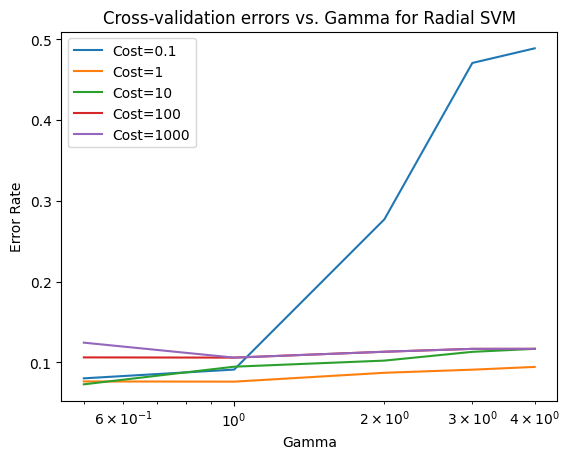

In [23]:
## plot the cross-validation errors for the radial SVM

## reshape the data for plotting

cv_errors_rad = np.array(cv_errors_rad).reshape(len(costs), len(gammas))

## plot the cost values versus the cross-validation error rate

fig, ax = plt.subplots()
for i, cost in enumerate(costs): ## enumerate will iterate over the cost list and keep track of the index values too
    ax.plot(gammas, cv_errors_rad[i,:], label=f'Cost={cost}')
ax.set_xscale('log')
ax.set_xlabel('Gamma')
ax.set_ylabel('Error Rate')
ax.set_title('Cross-validation errors vs. Gamma for Radial SVM')
ax.legend()
plt.show()

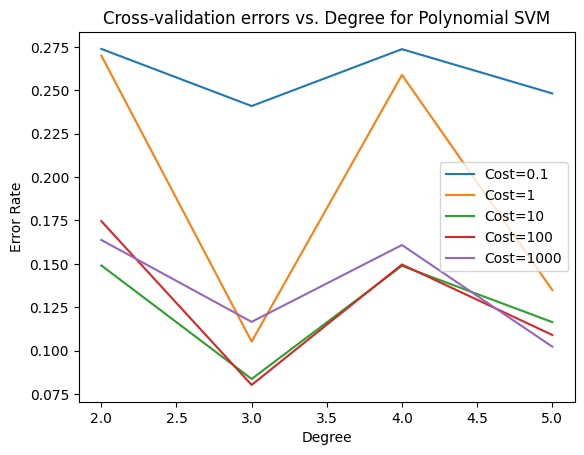

In [24]:
## plot the cross-validation errors for the polynomial SVM

## reshape the data for plotting

cv_errors_poly = np.array(cv_errors_poly).reshape(len(costs), len(degrees))

## plot the cost values versus the cross-validation error rate

fig, ax = plt.subplots()
for i, cost in enumerate(costs):
    ax.plot(degrees, cv_errors_poly[i,:], label=f'Cost={cost}')
ax.set_xlabel('Degree')
ax.set_ylabel('Error Rate')
ax.set_title('Cross-validation errors vs. Degree for Polynomial SVM')
ax.legend()
plt.show()

In [25]:
print("Linear SVC:")
print(f"Cost: {best_cost}, CV Error Rate: 0.07288359788359777")
print()

print("Radial SVM:")
print(f"Cost: {best_cost_gamma[0]}, Gamma: {best_cost_gamma[1]}, CV Error Rate: 0.072883597883598")
print()

print("Polynomial SVM:")
print(f"Cost: {best_cost_degree[0]}, Degree: {best_cost_degree[1]}, CV Error Rate: 0.08015873015873021")

Linear SVC:
Cost: 10, CV Error Rate: 0.07288359788359777

Radial SVM:
Cost: 10, Gamma: 0.5, CV Error Rate: 0.072883597883598

Polynomial SVM:
Cost: 100, Degree: 3, CV Error Rate: 0.08015873015873021


# PollEV

https://pollev.com/cynthiamarqueztuesta471